# Movie Market Analysis

**Author:** Carlos Garza
***

## Overview

This notebook contains an analysis of the current trends in the film industry to provide insight and recommendations in relation to the new Microsoft movie studio. Using data from IMDb, Box Office Mojo, and the-numbers.com, actionable recommendations were reached in relation to effective movie budgets, successful movie genres, and the optimal runtime to promote high ratings.

## Business Problem
With Microsoft looking to break into the film industry, it is imperative that their investment is well informed. With that in mind, I explored data to provide informed strategy recommendations in regards to ideal investment size, successful movie genres, and effective movie run times to maximize ratings and interest.
These strategies have been observed to be effective and profitable business solutions.

The data, methodology, and derived conclusions are detailed in the body of this document.

***

## Data

The data used in this project comes from IMDb, Box Office Mojo, and the-numbers.com. the data is summarized below.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') #setting plotting theme

%matplotlib inline

In [2]:
bommoviegross_df = pd.read_csv('data/bom.movie_gross.csv.gz') #Box Office Mojo
imdbtitlebasics_df = pd.read_csv('data/imdb.title.basics.csv.gz') #IMDb
imdbtitleratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz') #IMDb
budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz') #the-numbers

### DataFrame heads and info lists

In [3]:
bommoviegross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [4]:
bommoviegross_df.info() #Note: roughly a third of the titles included are missing data for foreign earnings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
imdbtitlebasics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [6]:
imdbtitlebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
imdbtitleratings_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [8]:
imdbtitleratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
budgets_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [10]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


***
***
## 1. Budget Exploration
The first trends I explored involved the rate of return expected from movies in relation to the budget invested.
To accomplish this, I used a combination of the budget table from the-numbers and the data from Box Office Mojo.

In [11]:
#set data index to movie names
bommoviegross_df.set_index('title', inplace = True)
budgets_df.set_index('movie', inplace = True)

In [12]:
#inner join to avoid NaN values.
#Dropping redundant columns from budgets table

moviebudgets_df = bommoviegross_df.join(budgets_df.drop(columns = ['domestic_gross', 'worldwide_gross']), how = 'inner')
moviebudgets_df.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,54,"Mar 11, 2016","$5,000,000"
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018","$35,000,000"
12 Years a Slave,FoxS,56700000.0,131100000,2013,18,"Oct 18, 2013","$20,000,000"
127 Hours,FoxS,18300000.0,42400000,2010,6,"Nov 5, 2010","$18,000,000"
13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016,30,"Jan 15, 2016","$50,000,000"


### Data Cleaning
The tables displayed below reveal some data cleaning that is necessary before any meaningful analysis can be performed.

The production budget values must be converted from strings to integers. This will be accomplished by writing a function and applying it to each row using a .map(lambda x) function.

Because the foreign gross column has enough missing data to strongly affect any algorythms, the scope of this analysis will focus on domestic analysis. Because there are only two missing domestic gross values, those rows will just be dropped from calculations.

In [13]:
moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 10 Cloverfield Lane to mother!
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1246 non-null   object 
 1   domestic_gross     1245 non-null   float64
 2   foreign_gross      1086 non-null   object 
 3   year               1247 non-null   int64  
 4   id                 1247 non-null   int64  
 5   release_date       1247 non-null   object 
 6   production_budget  1247 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 77.9+ KB


In [14]:
moviebudgets_df.isna().sum()

studio                 1
domestic_gross         2
foreign_gross        161
year                   0
id                     0
release_date           0
production_budget      0
dtype: int64

In [15]:
#money string to integer function ($000,000,000)->(000000000)
def moneystr(str):
    no_dollar = str[1:]
    cleanstr = ''
    for i in range(len(no_dollar)):
        if no_dollar[i] != ',':
            cleanstr += no_dollar[i]
    return int(cleanstr)

In [16]:
#convert production budget to integer
moviebudgets_df['production_budget'] = moviebudgets_df['production_budget'].map(lambda x: moneystr(x))

In [17]:
#Drop rows with missing domestic gross data
moviebudgets_df.dropna(subset=['domestic_gross'], inplace=True)

Before Continuing, I will recheck the columns above and see if their updated values reflect the adjustments we wanted to see.

In [18]:
moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 10 Cloverfield Lane to mother!
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1244 non-null   object 
 1   domestic_gross     1245 non-null   float64
 2   foreign_gross      1084 non-null   object 
 3   year               1245 non-null   int64  
 4   id                 1245 non-null   int64  
 5   release_date       1245 non-null   object 
 6   production_budget  1245 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 77.8+ KB


In [19]:
moviebudgets_df.isna().sum()

studio                 1
domestic_gross         0
foreign_gross        161
year                   0
id                     0
release_date           0
production_budget      0
dtype: int64

***

### Profit Margins
to analyze profit against budget invested, a domestic profit and percent profit columns will be created.

Percent profit is useful because it is unitless so it is not affected by inflation.

In [20]:
moviebudgets_df['domestic_profit'] = moviebudgets_df['domestic_gross'] - moviebudgets_df['production_budget']
moviebudgets_df['profit_percentage'] = moviebudgets_df['domestic_profit']*100/moviebudgets_df['production_budget']
moviebudgets_df.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,domestic_profit,profit_percentage
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,54,"Mar 11, 2016",5000000,67100000.0,1342.000000
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018",35000000,10800000.0,30.857143
12 Years a Slave,FoxS,56700000.0,131100000,2013,18,"Oct 18, 2013",20000000,36700000.0,183.500000
127 Hours,FoxS,18300000.0,42400000,2010,6,"Nov 5, 2010",18000000,300000.0,1.666667
13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016,30,"Jan 15, 2016",50000000,2900000.0,5.800000


In order to better emmulate established studios with the most movie making experience, I will find the studios that have produced the most work and analyze their profit margins.

In [21]:
#most productive studios
moviebudgets_df.studio.value_counts().head()

Uni.    117
Fox     110
WB      102
Par.     74
Sony     74
Name: studio, dtype: int64

Lastly, I will create a new dataframe of movies exclusively from the top three highest producing studios and create a visualization of the resulting data.

In [22]:
high_output_studios = moviebudgets_df[(moviebudgets_df['studio']=='Uni.')
                                      |(moviebudgets_df['studio']=='Fox')
                                      |(moviebudgets_df['studio']=='WB')]

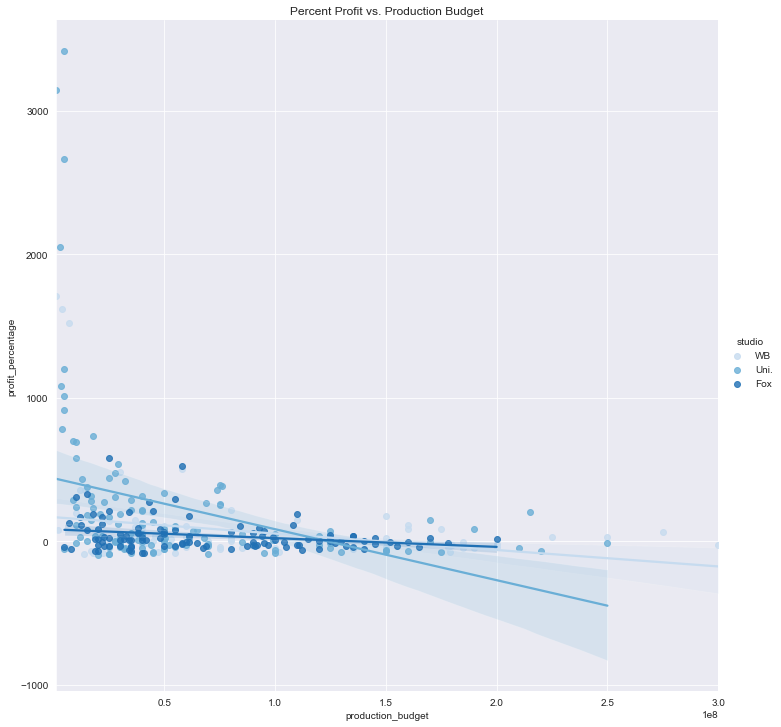

In [23]:
sns.lmplot(x='production_budget', y='profit_percentage',
           hue='studio',palette='Blues', height=10,
           data=high_output_studios).set(title = 'Percent Profit vs. Production Budget');

### Insight:
From the top three studios' data, it can be shown that percent profit tends to shrink as the budget increases. You can make more money with higher budgets, but that positive rate of return slowly diminishes until budgets reach roughly $120,000,000. This is the budget where you are statistically most likely to break even.

***
***

## 2. Genre Exploration
The second trends I explored were in an effort to discover the best movie genres to pursue. To accomplish this, I used a combination of data from IMDb.

### Data Cleaning
Any missing values in the genre column will be filled with 'UNKNOWN'

In [24]:
# replace NaN genres with 'UNKNOWN'
imdbtitlebasics_df['genres'].fillna('UNKNOWN', inplace=True)

Next, I'll make the genres values itterable lists instead of strings

In [25]:
imdbtitlebasics_df['genrelist']=imdbtitlebasics_df['genres'].map(lambda x: x.split(','))
imdbtitlebasics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genrelist
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


For a future calculation, it will be easier to also break up the genre list into separate columns. First check max length of genre list then make genre columns to fit that max number. 
Any row with less than three columns will fill the empty columns with 'NONE'

In [26]:
imdbtitlebasics_df['genrelist'].map(lambda x: len(x)).max()

3

In [27]:
imdbtitlebasics_df['genre1']=imdbtitlebasics_df['genrelist'].map(lambda x: x[0])
imdbtitlebasics_df['genre2']=imdbtitlebasics_df['genrelist'].map(lambda x: x[1] if len(x)>1 else 'NONE')
imdbtitlebasics_df['genre3']=imdbtitlebasics_df['genrelist'].map(lambda x: x[2] if len(x)>2 else 'NONE')

In [28]:
imdbtitlebasics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genrelist,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]",Biography,Drama,NONE
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama],Drama,NONE,NONE
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]",Comedy,Drama,NONE
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",Comedy,Drama,Fantasy


Next, set the titlebasics and titleratings indeces to 'tconst' to be ready for joining. Using inner join to avoid missing data

In [29]:
imdbtitlebasics_df.set_index('tconst', inplace=True)
imdbtitleratings_df.set_index('tconst', inplace=True)

In [30]:
genreandrating_df = imdbtitlebasics_df.join(imdbtitleratings_df, how='inner')
genreandrating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73856 non-null  object 
 5   genrelist        73856 non-null  object 
 6   genre1           73856 non-null  object 
 7   genre2           73856 non-null  object 
 8   genre3           73856 non-null  object 
 9   averagerating    73856 non-null  float64
 10  numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 6.8+ MB


In [31]:
genreandrating_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genrelist,genre1,genre2,genre3,averagerating,numvotes
tconst,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]",Action,Crime,Drama,7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]",Biography,Drama,NONE,7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama],Drama,NONE,NONE,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]",Comedy,Drama,NONE,6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",Comedy,Drama,Fantasy,6.5,119


### Best Performing Genres
From the joined dataframe above, we can find the genres that performed best.

Because many movies have multiple genres listed, I decided to itterate through the above dataframe for each genre and average the ratings of every film that identifies as that genre. the new data is stored in a dictionary. {'genre': rating}

In [32]:
# itterate through every movie and be sure every unique genre is accounted for in a list
genremean1 = genreandrating_df.groupby('genre1').mean()

In [33]:
genres_list = list(genremean1.index)
genre_avg_rating = {}
for genre in genres_list:
    rate_sum = 0
    rate_len = 0
    for i in range(len(genreandrating_df)):
        if genre in genreandrating_df.iloc[i]['genrelist']:
            rate_sum += genreandrating_df.iloc[i]['averagerating']
            rate_len += 1
    genre_avg_rating[genre] = rate_sum/rate_len

With this dictionary of data, a new dataframe is created for plotting. 

In [34]:
avg_rating_df = pd.DataFrame.from_dict({'genres': list(genre_avg_rating.keys()),
                                        'avg_rating': list(genre_avg_rating.values())})

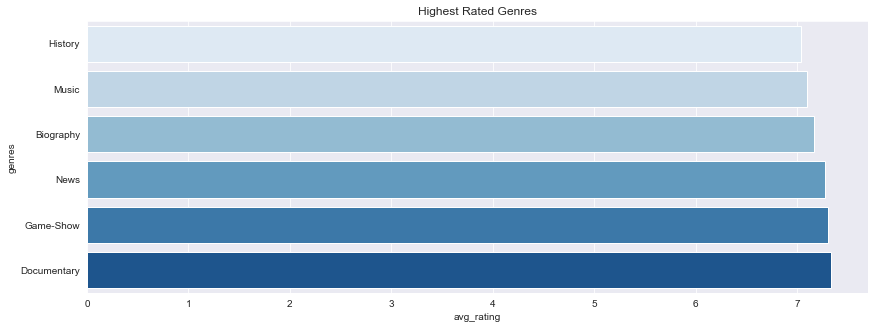

In [35]:
plt.figure(figsize=(14,5))
plt.title("Highest Rated Genres")
sns.barplot(x='avg_rating', y='genres',
            palette = 'Blues', data=avg_rating_df.sort_values('avg_rating').tail(6));

This plot shows that documentaries are the highest rated movies on average!

To double check that the distribution of these movie ratings is consistent with these findings, I created a function that returns a dataframe of all movies with a selected genre. This function is used to plot histograms of movie ratings.

In [36]:
def genreselector(data, genre):
    temp_df = data[(data['genre1']==genre)
                                 |(data['genre2']==genre)
                                 |(data['genre3']==genre)]
    return temp_df

Text(0.5, 1.0, 'Documentary Rating Count')

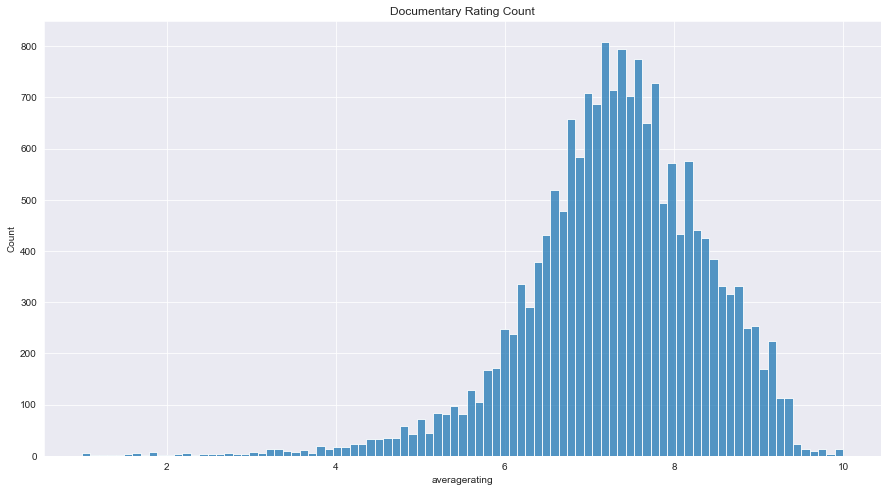

In [37]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'averagerating', palette = 'Blues', data = genreselector(genreandrating_df,'Documentary'))
plt.title('Documentary Rating Count')

Text(0.5, 1.0, 'Game Show Rating Count')

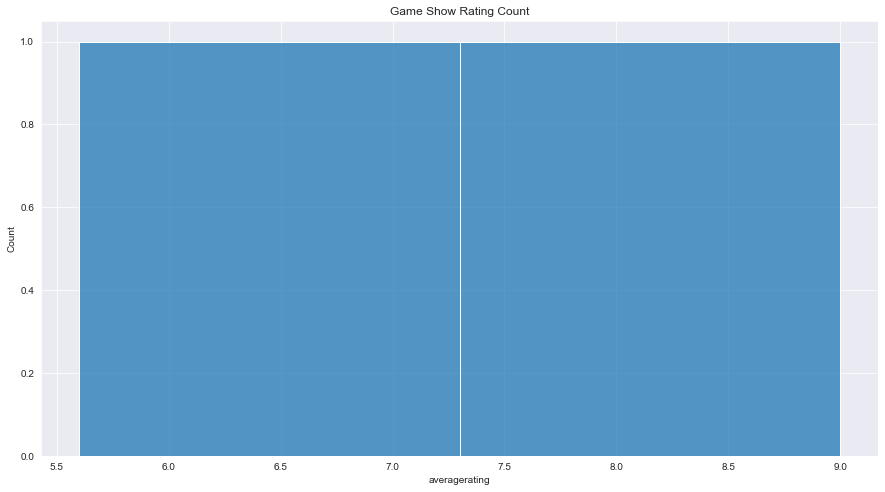

In [38]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'averagerating', palette = 'Blues', data = genreselector(genreandrating_df,'Game-Show'))
plt.title('Game Show Rating Count')

Text(0.5, 1.0, 'News Rating Count')

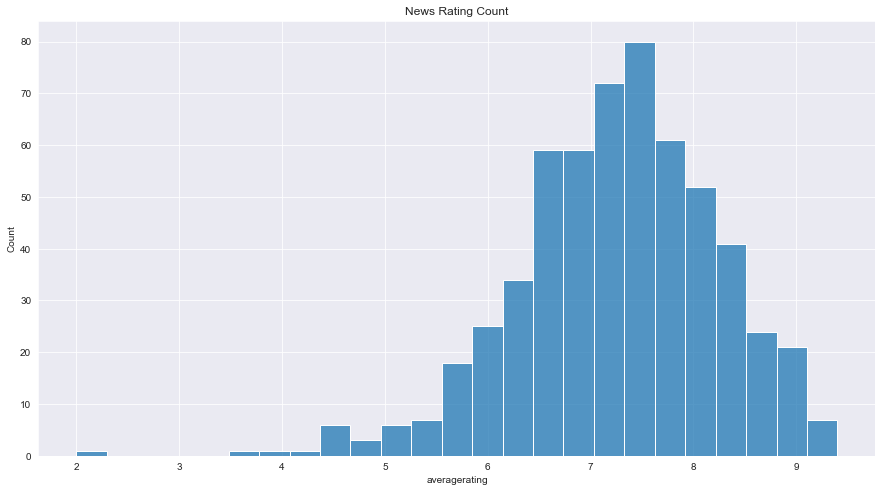

In [39]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'averagerating', palette = 'Blues', data = genreselector(genreandrating_df,'News'))
plt.title('News Rating Count')

Text(0.5, 1.0, 'Biography Rating Count')

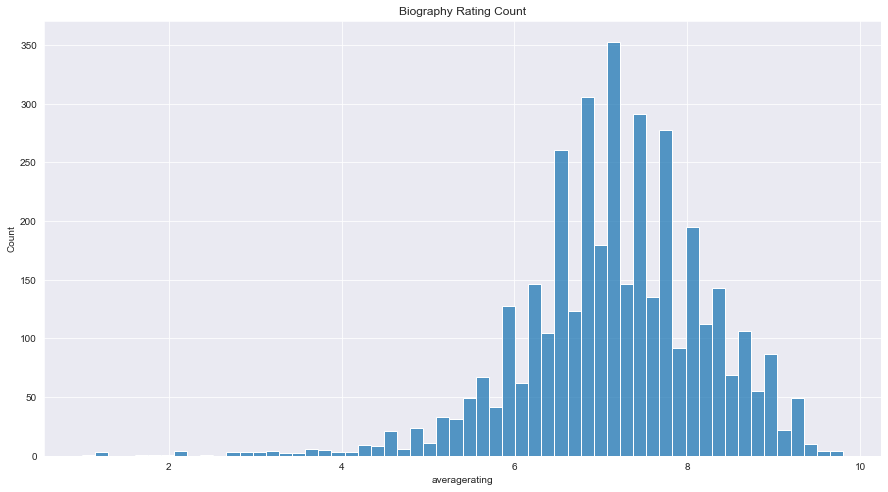

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'averagerating', palette = 'Blues', data = genreselector(genreandrating_df,'Biography'))
plt.title('Biography Rating Count')

### Insight:
the game show genre might have too few data points to be helpful in this analysis, but the top three genres excluding game shows have potential to be successful directions for the new Microsoft Studio.

## 3. Documentary Length
If Microsoft moves into the field of documentary production, is it more beneficial to produce short documentaries or feature length+ documentaries?
Using the genreselector function from insight 2, we can explore documentary length for valuable trends.

In [41]:
documentaries = genreselector(genreandrating_df,'Documentary')
runtime_ratings = documentaries.groupby('averagerating').median().reset_index()
runtime_ratings.head()

,averagerating,start_year,runtime_minutes,numvotes
0,1.0,2012.0,60.0,8.0
1,1.1,2012.0,142.0,55.0
2,1.2,2012.0,42.5,199.0
3,1.3,2016.5,50.5,1631.0
4,1.4,2016.0,60.0,23.0


Text(0.5, 1.0, 'Avg. Rating as Function of Time')

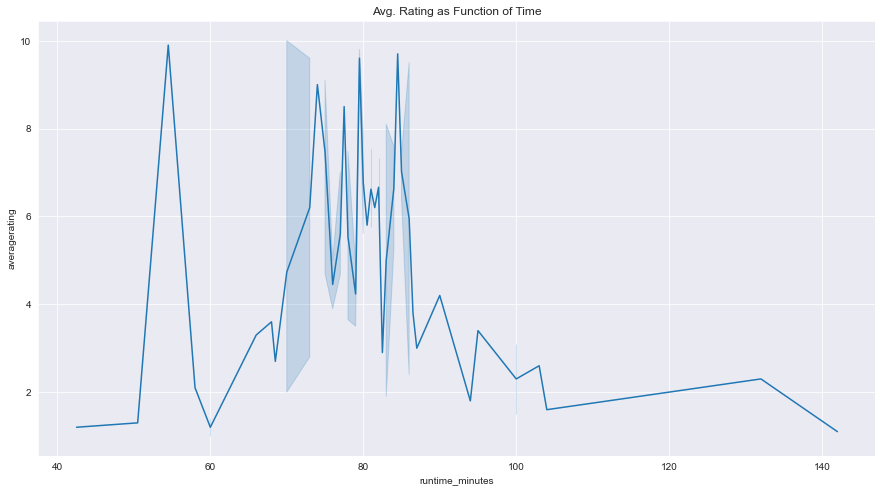

In [42]:
plt.figure(figsize=(15,8))
sns.lineplot(y='averagerating', x = 'runtime_minutes', data = runtime_ratings)
plt.title('Avg. Rating as Function of Time')

### Insight:
From the line graph relating average rating to runtime in minutes, there are definite peaks just below 60 minutes and between 70 and 90 minutes. This leads me to believe that somewhat short documentaries meant for television slots or streaming are very highly rated, as well as more detailed documentaries that are no longer than 90 minutes.

***
***
***
## Conclusions

My analysis concluded that a very effective direction for the newly established Microsoft Studio would be to produce hour to hour and a half long documentaries with budgets that do not exceed $120M.

Documentaries are an extremely popular film genre that pretty consistently earns good reviews. With Microsoft's branding aimed for the, "tech savvy, working, and educated," it is safe to assume that a large part of Microsoft's existing users and audience also enjoys documentaries.

If documentaries and other educational genres like news and biography films make up the beginning of the Microsoft Studios catalog, You may have the flexibility to enter other genre markets with experience and an existing reputation of success.

***
## Future Work

Continuing this work, there are a handful of details that could prove useful in refining results.

One factor that I ommitted in my analysis was review counts. When aggragating the average reviews to find the highest rated genres, It could prove insightful to weigh average reviews differently depending on review count. Lower review counts increase the risk of a sample not properly representing a full population.

Another future analysis might include budget v. profit analysis for individual genres rather than all movies as a whole. Different genres may behave differently from one another.

Although there are other factors that can narrow in on more precise answers, I am confident in my analysis and in its characterization of the film industry.